## EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("prepared_matches/10y.csv")

In [3]:
target_variable_by_season = pd.DataFrame(
    df.groupby(by="Season")["result"].value_counts(normalize=True)
).rename({"result": "share"}, axis=1).reset_index()

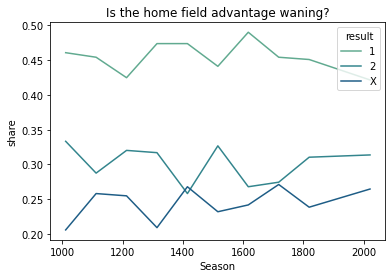

In [4]:
plt.title("Is the home field advantage waning?")
sns.lineplot(
    data=target_variable_by_season, x="Season", y="share", 
    hue="result", palette="crest")
plt.show()